Есть два вида функций, с помощью которых это можно сделать: 

**функционалы качества.** Они измеряют похожесть, поэтому функционалы качества мы максимизируем, ведь нам нужна как можно большая похожесть правильного значения и предсказанного<br />
**функции ошибки.** Измеряют различие между правильным ответом и полученным, поэтому функции ошибки мы будем минимизировать, чтобы получить как можно меньшую ошибку

Часто оба вида этих функций мы объединяем общим словом метрика, это пришло из англоязычной науки. 

Рассмотрим различные метрики для оценки качества регрессии, в теории и на практике:

### MAE (Mean Absolute Error)

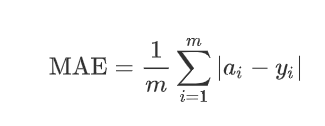

Чтобы посчитать эту метрику, нужно найти все остатки (разницы между предсказанным значением и реальным), взять от каждого из них модуль, сложить их и поделить на количество. Иными словами, нам нужно найти среднее арифметическое модуля отклонения предсказанного значения от реального.

### MSE (Mean Squared Error)

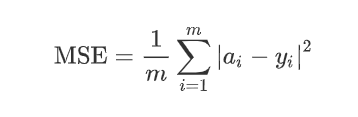

Логика вычисления этой ошибки очень похожа на предыдущую. Разница лишь в том, что вместо модуля разности между предсказанным значением и реальным мы берем квадрат этого модуля.

Проблема данной метрики в том, что ее довольно сложно интерпретировать. Поэтому часто вместо MSE берут RMSE.  С точки зрения оптимизации между MSE и RMSE разницы нет, однако в RMSE в силу того, что мы извлекаем корень, значения возвращаются  масштаб целевой переменной, и интерпретация становится проще

### RMSE (Root Mean Squared Error):

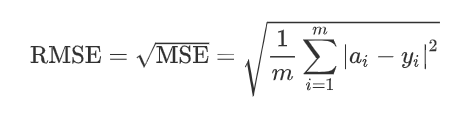

### MAPE (Mean Absolute Percentage Error):

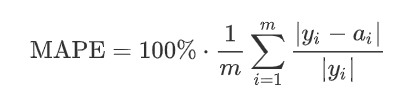

Реже используемая, но все равно важная метрика. Для ее вычисления модуль разницы между предсказанием алгоритма и истинным значением мы делим на истинное значение. Потом складываем все результаты (для каждого объекта), делим на количество и умножаем на 100 %. Итак, эта метрика показывает, на сколько процентов в среднем наше предсказание отклоняется от реального значения.

Есть еще одна метрика, связанная с MAPE: Симметричный средний процент отклонения

### SMAPE (Symmetric Mean Absolute Percentage Error)

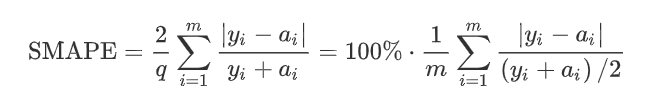

Функции SMAPE и MAPE часто используют при прогнозировании временных рядов, особенно финансовых, где как раз разумно измерять ошибку в процентах.

Эти метрики часто уместно использовать при работе с представителями менеджмента, так как при расчете рисков и осознании результатов им чаще всего наиболее интуитивно понятна именно разница в процентах, а не абсолютная. Да, действительно, эти метрики наиболее легко интерпретируемы.

Кроме этих метрик, есть целый класс функций ошибок, основанных на сравнении с некоторым бенчмарком (ориентиром/эталоном). Обозначим за  /a_{i}/ – метки бенчмарка и рассмотрим следующую метрику:

### MRAE (Mean Relative Absolute Error)

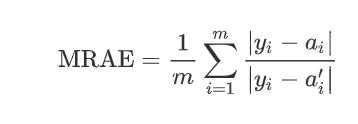

Это среднее отношение ошибок, полученных алгоритмом и полученных бенчмарком. Также можно рассматривать не среднее, а сумму:

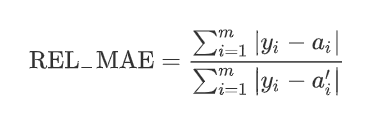

Более понятным вариантом такой метрики является Percent Better. этот функционал качества определяет, в каком проценте случаев алгоритм превосходит по качеству бенчмарк. Он вычисляется следующим образом:

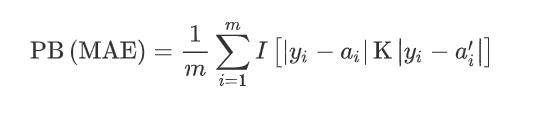

Возникает вопрос: откуда брать бенчмарк?

Есть несколько вариантов:

константный алгоритм;<br />
ваши алгоритмы, результаты которых вы хотите улучшить. Можно сравнивать результат со своим же для оценки повышения эффективности.

### Задание 7.4.5

In [13]:
"""Допустим, у вас есть выборки y_true = [1.23, 2.35, 2.75] и y_pred = [1.01, 12.3, 2.74].

Посчитайте метрику RMSE, округлите до сотых и запишите результат. Например, 3.14"""

import numpy as np

y_true = np.array([1.23, 2.35, 2.75])
y_pred = np.array([1.01, 12.3, 2.74])

RMSE = np.sqrt(np.sum((y_true - y_pred)**2) / len(y_true))

RMSE



5.746042116100439

Поговорим о метриках качества, самая базовая из которых — функция ошибки Loss function. Посчитаем значение ошибки для случайно предсказанных классов. Нашим алгоритмом будет монетка с тремя гранями, которая пытается угадать класс ириса.

In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

iris_data = pd.read_csv('input/iris.data', 
                        names=['sepal_length', 'sepal_width', 
                               'petal_length', 'petal_width', 'class'])

# Функция, выбирающая один класс из заданного кол-ва классов
def monetka(n_classes=3):
    classes = np.arange(n_classes)
    predicted = np.random.choice(classes)
    
    return predicted

# Определить количество примеров, классов и сформировать словарь для конвертирования имени класса в порядковое число
n = iris_data.shape[0]
class_to_num = {cl: num for num, cl in enumerate(np.unique(iris_data['class']))}
n_classes = len(class_to_num)

# Истинные значения
y = np.array(iris_data['class'].apply(lambda cl: class_to_num[cl]))

# Предсказанные монеткой значения
y_pred = np.array([monetka(n_classes) for _ in range(n)])
y_hat = np.zeros((n, n_classes), dtype=np.float32)
for num in class_to_num.values():
    y_hat[:, num] = 1. * (y_pred == num)

from sklearn.metrics import log_loss

# Посчитаем значение ошибки
log_loss(y, y_hat)

22.795592422485353

В результате мы получили 21.8. Что это значит? Наверняка сказать нельзя, потому что функции ошибки не всегда читаются напрямую. Они имеют смысл при сравнении: при хорошей сходимости алгоритма ошибка должна падать после очередной итерации обучения.

Для более понятных человеку результатов рассмотрим класс популярных метрик, относящихся к бинарной классификации. Для подсчёта метрик возьмём искусственную задачу, где определим истинные классы следующим образом:

In [63]:
n = 100    # размер выборки
p = 0.1    # доля примеров класса 1

from scipy import stats

# Сгенерируем n примеров с долей единиц равной p
dist = stats.bernoulli(p)
y_true = dist.rvs(n)
print(y_true)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]


Первая метрика, которую мы посмотрим — Accuracy или точность, самая базовая и простая. Посчитаем метрику:

In [64]:
def calc_accuracy(y_true, y_pred):
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    acc = round((((TP + TN) / (P + N)) * 100), 2)
    
    return acc, TP, TN, P, N

In [65]:
# Двухгранная монетка. Кинем сто (n) раз
y_pred = np.array([monetka(2) for _ in range(n)])

In [66]:
acc, TP, TN, P, N = calc_accuracy(y_true, y_pred)
print('TP = {}\nTN = {}\nP = {}\nN = {}\nacc = {}%'.format(TP,TN,P,N,acc))

TP = 8
TN = 39
P = 11
N = 89
acc = 47.0%


Можем посчитать accuracy с помощью встроенного метода в библиотеку sklearn.metrics

In [67]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_pred)
print('Accuracy from scikit-learn: {}%'.format(acc * 100))

Accuracy from scikit-learn: 47.0%


В идеале значение точности должно приближатся к 50%: для этого нужно делать много подбрасываний и средних значений. Мы можем улучшить результат выборки до 90%: пусть монетка будет однобокой и выдавать 0 в качестве ответа:

In [45]:
y_pred = np.zeros(n)

In [46]:
acc, TP, TN, P, N = calc_accuracy(y_true, y_pred)
print('TP = {}\nTN = {}\nP = {}\nN = {}\nacc = {}%'.format(TP,TN,P,N,acc))

TP = 0
TN = 92
P = 8
N = 92
acc = 92.0%


По факту монетка стала предсказывать только один класс, в этом и есть проблема accuracy: если выборка содержит разное количество примеров каждого класса, то добиться высокой точности можно без предсказывания редких классов.

Дисбаланс классов можно избежать с помощью метрик precision, recall и F1-score. Посчитаем метрики precision и recall для нашей задачи с помощью методов precision_score и recall_score библиотеки sklearn:

In [68]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, 1 - y_pred)
recall = recall_score(y_true, 1 - y_pred)
print('precision: {:.2f}\nrecall: {:.2f}'.format(precision, recall))

precision: 0.07
recall: 0.27


Интересный факт про обе метрики заключается в том, что при возрастании одной общей тенденции второй является падение. В некотором смысле они противоположны.

Результаты получились не такими хорошими, как с первой метрикой. Алгоритм никогда не назначает объектам положительный класс. Две метрики не очень удобно использовать, легче применять F1-score, которая объединяет precision и recall. Посчитаем F1-score для нашей задачи с помощью метода f1_score библиотеки sklearn:

In [69]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print('F1-score: {:.2f}'.format(f1))

F1-score: 0.23


**Результат выходит неудовлетворительный, потому что чем значение F1-score выше, тем оно лучше! (0 - это все плохо, а 1 - это хорошо)**. Воспользуемся ещё одним методом, объединяющим precision и recall, — precision-recall curve. Метрика показывает, насколько точно алгоритм выбирает положительные объекты при изменении его чувствительности к положительному классу.

Посчитаем precision-recall curve, используя метод precision_recall_curve:

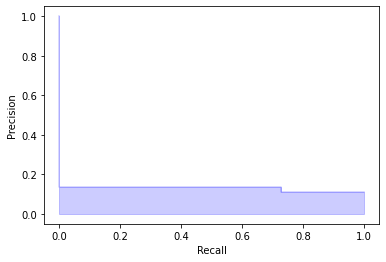

In [70]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, _ = precision_recall_curve(y_true, y_pred)

plt.step(recalls, precisions, color='b', alpha=0.2, where='post')
plt.fill_between(recalls, precisions, step='post', alpha=0.2, color='b')
plt.xlabel('Recall');
plt.ylabel('Precision');

И снова мы получили результат, что модель очень плохая.

Еще одной обобщающей характеристикой precision и recall является **average precision (AP)**, которая вычисляется как взвешенное среднее значений precision:
$$
AP = \sum_{n}{(R_n - R_{n-1})P_n},
$$
где $P_n$ и $R_n$ — precision и recall при $n$-ом отсечении. В некотором приближении значение AP есть значение иной характеристики, называемой **area under curve (AUC)** (площадь под кривой), являющейся важной метрикой при разработке классификаторов и детекторов.

Вычислим AP, используя метод [average_precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html) библиотеки scikit-learn:

In [71]:
from sklearn.metrics import average_precision_score

In [72]:
ap = average_precision_score(y_true, y_pred)
print('Average Precision (AP) = {:.2f}'.format(ap))

Average Precision (AP) = 0.13




Когда мы работаем с классификацией, где больше двух классов, лучше использовать Confusion matrix. Это матрица, которая предсказывает отношений истинных и предсказанных значений. Вернёмся к задаче с ирисами и посчитаем confusion matrix с помощью метода confusion_matrix:

In [52]:
from sklearn.metrics import confusion_matrix

# Определить количество примеров, классов и сформировать словарь для конвертирования имени класса в порядковое число
n = iris_data.shape[0]
class_to_num = {cl: num for num, cl in enumerate(np.unique(iris_data['class']))}
n_classes = len(class_to_num)

# Истинные значения
y_true = np.array(iris_data['class'].apply(lambda cl: class_to_num[cl]))

# Предсказанные монеткой значения
y_pred = np.array([monetka(n_classes) for _ in range(n)])

conf_mat = confusion_matrix(y_true, y_pred).T
print('Confusion matrix:\n{}'.format(conf_mat))

Confusion matrix:
[[14 16 12]
 [18 17 20]
 [18 17 18]]


Нарисуем confusion matrix так, чтобы было понятнее, что происходит:

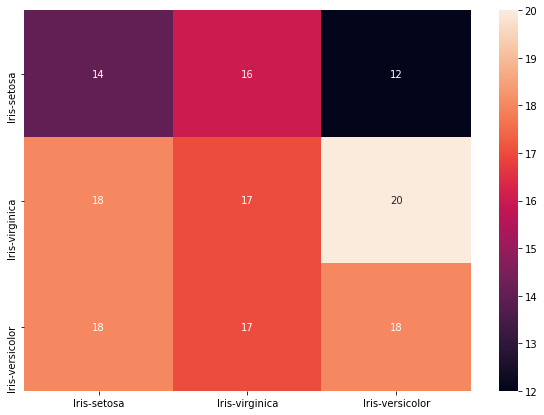

In [73]:
import seaborn as sn
class_names = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True);

Если модель работает хорошо, то на главной диагонали (там, где 14, 17 и 18 (слева вверх направо вниз)) будут числа отличные от 0, а по бокам будут числа, которые будут стремиться к 0. В реальности такого не происходит, но мы стремимся к этому.

### А теперь — задание!

In [74]:
"""Задание 7.5.1

Загрузите данные train.csv,
оставьте в данных только признаки 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due',
затем избавьтесь от пропусков.

Целевой переменной будет 'balance_due',
разделите данные на обучающую и тестовую выборки в соотношении 70% на 30% без перемешивания.

Обучите линейную регрессию из scikit-learn и
запишите в переменную result значение метрики RMSE на тестовой выборке.

Примечание: RMSE означает Rooted Mean Squared Error. Rooted означает, что из значения метрики был взят корень."""

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
vis_data = pd.read_csv("input/train_7_5.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже

In [76]:
vis_data = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']]
vis_data

,fine_amount,state_fee,late_fee,discount_amount,balance_due
0,250.0,10.0,25.0,0.0,305.0
1,750.0,10.0,75.0,0.0,75.0
2,250.0,0.0,0.0,0.0,0.0
3,250.0,0.0,0.0,0.0,0.0
4,250.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
250301,1000.0,0.0,0.0,0.0,0.0
250302,1000.0,0.0,0.0,0.0,0.0
250303,1000.0,0.0,0.0,0.0,0.0
250304,1000.0,0.0,0.0,0.0,0.0


In [77]:
vis_data = vis_data.dropna(axis='index', how='any')
vis_data

,fine_amount,state_fee,late_fee,discount_amount,balance_due
0,250.0,10.0,25.0,0.0,305.0
1,750.0,10.0,75.0,0.0,75.0
2,250.0,0.0,0.0,0.0,0.0
3,250.0,0.0,0.0,0.0,0.0
4,250.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
250301,1000.0,0.0,0.0,0.0,0.0
250302,1000.0,0.0,0.0,0.0,0.0
250303,1000.0,0.0,0.0,0.0,0.0
250304,1000.0,0.0,0.0,0.0,0.0


In [101]:
y = vis_data['balance_due'].values
X = vis_data.drop(['balance_due'], axis=1)
print(y)
print(X)

[305.  75.   0. ...   0.   0.   0.]
        fine_amount  state_fee  late_fee  discount_amount
0             250.0       10.0      25.0              0.0
1             750.0       10.0      75.0              0.0
2             250.0        0.0       0.0              0.0
3             250.0        0.0       0.0              0.0
4             250.0        0.0       0.0              0.0
...             ...        ...       ...              ...
250301       1000.0        0.0       0.0              0.0
250302       1000.0        0.0       0.0              0.0
250303       1000.0        0.0       0.0              0.0
250304       1000.0        0.0       0.0              0.0
250305       1000.0        0.0       0.0              0.0

[250305 rows x 4 columns]


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=27072020)

In [103]:
# проверяем
X_train.shape, X_test.shape, X.shape, y_train.shape, y_test.shape

((175213, 4), (75092, 4), (250305, 4), (175213,), (75092,))

In [104]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
model.fit(X_train, y_train) #обучаем модель на обучающих данных

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [106]:
mse1 = mean_squared_error(y_train, y_train_pred)
mse2 = mean_squared_error(y_test, y_test_pred)

rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)

print(rmse1)
print(rmse2)

213.0053855634002
132.080334458986
